In [1]:
# Notebook guide from: https://www.youtube.com/watch?v=QpR4QEv5Urk

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('monet')
jovian.set_colab_id('1zufVvUB_kkcmfhTT9kKB73_QelvigpuU')

     |████████████████████████████████| 68 kB 2.6 MB/s 


# Training Generative Adversarial Networks (GANs) in PyTorch


In [2]:
project_name = 'monet'

In [3]:
# Uncomment and run the appropriate command for your operating system, if required
# No installation is reqiured on Google Colab / Kaggle notebooks

# Linux / Binder / Windows (No GPU)
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Linux / Windows (GPU)
!pip install numpy matplotlib torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
 
# MacOS (NO GPU)
# !pip install numpy matplotlib torch torchvision torchaudio

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.5 MB/s eta 0:03:33tcmalloc: large alloc 1147494400 bytes == 0x5639e1996000 @  0x7fd5e4db7615 0x5639a8d6a4cc 0x5639a8e4a47a 0x5639a8d6d2ed 0x5639a8e5ee1d 0x5639a8de0e99 0x5639a8ddb9ee 0x5639a8d6ebda 0x5639a8de0d00 0x5639a8ddb9ee 0x5639a8d6ebda 0x5639a8ddd737 0x5639a8e5fc66 0x5639a8ddcdaf 0x5639a8e5fc66 0x5639a8ddcdaf 0x5639a8e5fc66 0x5639a8ddcdaf 0x5639a8d6f039 0x5639a8db2409 0x5639a8d6dc52 0x5639a8de0c25 0x5639a8ddb9ee 0x5639a8d6ebda 0x5639a8ddd737 0x5639a8ddb9ee 0x5639a8d6ebda 0x5639a8ddc915 0x5639a8d6eafa 0x5639a8ddcc0d 0x5639a8ddb9ee
     |█████████████████████████████▏  | 1055.7 MB 1.3 MB/s eta 0:01:20tcmalloc: large alloc 1434370048 bytes == 0x563a25fec000 @  0x7fd5e4db7615 0x5639a8d6a4cc 0x5639a8e4a47a 0x5639a8d6d2ed 0x5639a8e5ee1d 0x5639a8de0e99 0x5639a8ddb9ee 0x5639a8d6ebda 0x5639a8de0d00 0x5639a8ddb9ee 0x5639a8d6ebda 0x5639a8ddd737 0x5639a8e5fc66 0x5639a8ddcd

## Downloading and Exploring the Data




In [4]:
#!pip install opendatasets --upgrade --quiet

In [5]:
#!unzip monet.zip

In [6]:
#import opendatasets as od

#dataset_url = 'https://www.kaggle.com/dimitreoliveira/monet-paintings-jpg-berkeley'
#od.download(dataset_url)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls '/content/drive/My Drive/monet'

generated  generatedgenerated-images-0000.png  images


The dataset has a single folder called `images` which contains all images in JPG format.

In [10]:
#import os

DATA_DIR = './images'
#print(os.listdir(DATA_DIR))


In [13]:
!ls '/content/drive/My Drive/monet/images' 

00001.jpg  00205.jpg  00399.jpg  00618.jpg  00805.jpg  00984.jpg  01167.jpg
00003.jpg  00206.jpg  00400.jpg  00619.jpg  00806.jpg  00985.jpg  01168.jpg
00004.jpg  00207.jpg  00401.jpg  00620.jpg  00807.jpg  00986.jpg  01169.jpg
00006.jpg  00208.jpg  00402.jpg  00621.jpg  00808.jpg  00987.jpg  01171.jpg
00007.jpg  00209.jpg  00403.jpg  00622.jpg  00809.jpg  00988.jpg  01172.jpg
00008.jpg  00210.jpg  00404.jpg  00623.jpg  00810.jpg  00989.jpg  01173.jpg
00009.jpg  00211.jpg  00405.jpg  00624.jpg  00811.jpg  00990.jpg  01174.jpg
00010.jpg  00212.jpg  00406.jpg  00625.jpg  00812.jpg  00991.jpg  01175.jpg
00011.jpg  00213.jpg  00407.jpg  00626.jpg  00813.jpg  00992.jpg  01176.jpg
00012.jpg  00214.jpg  00408.jpg  00627.jpg  00814.jpg  00993.jpg  01177.jpg
00014.jpg  00215.jpg  00409.jpg  00631.jpg  00815.jpg  00994.jpg  01178.jpg
00015.jpg  00216.jpg  00410.jpg  00632.jpg  00816.jpg  00995.jpg  01179.jpg
00016.jpg  00217.jpg  00411.jpg  00633.jpg  00817.jpg  00996.jpg  01180.jpg
00017.jpg  0

In [14]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [15]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [16]:
train_ds = ImageFolder('/content/drive/My Drive/monet/', transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor()
    ,T.Normalize(*stats)]))
#]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

Let's create helper functions to denormalize the image tensors and display some sample images from a training batch.

In [17]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

In [19]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

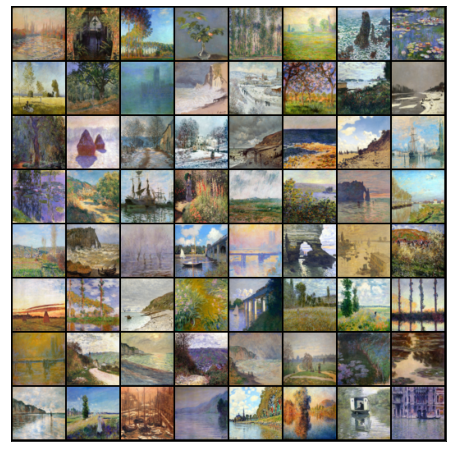

In [20]:
show_batch(train_dl)

In [21]:
!pip install jovian --upgrade --quiet

In [22]:
import jovian

In [24]:
jovian.commit(project="monet", environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/elaafsalem/monet


'https://jovian.ai/elaafsalem/monet'

## Using a GPU

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU, if one is available.

In [25]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`).

In [26]:
device = get_default_device()
device

device(type='cuda')

We can now move our training data loader using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available).

In [27]:
train_dl = DeviceDataLoader(train_dl, device)

## Discriminator Network

The discriminator takes an image as input, and tries to classify it as "real" or "generated". In this sense, it's like any other neural network. We'll use a convolutional neural networks (CNN) which outputs a single number output for every image. We'll use stride of 2 to progressively reduce the size of the output feature map.

![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_odd.gif)

In [28]:
import torch.nn as nn

In [29]:
discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())

Note that we're using the Leaky ReLU activation for the discriminator.

<img src="https://cdn-images-1.medium.com/max/1600/1*ypsvQH7kvtI2BhzR2eT_Sw.png" width="420">


>  Different from the regular ReLU function, Leaky ReLU allows the pass of a small gradient signal for negative values. As a result, it makes the gradients from the discriminator flows stronger into the generator. Instead of passing a gradient (slope) of 0 in the back-prop pass, it passes a small negative gradient.  - [Source](https://sthalles.github.io/advanced_gans/)

Just like any other binary classification model, the output of the discriminator is a single number between 0 and 1, which can be interpreted as the probability of the input image being real i.e. picked from the original dataset.

Let's move the discriminator model to the chosen device.

In [30]:
discriminator = to_device(discriminator, device)

## Generator Network

The input to the generator is typically a vector or a matrix of random numbers (referred to as a latent tensor) which is used as a seed for generating an image. The generator will convert a latent tensor of shape `(128, 1, 1)` into an image tensor of shape `3 x 28 x 28`. To achive this, we'll use the `ConvTranspose2d` layer from PyTorch, which is performs to as a *transposed convolution* (also referred to as a *deconvolution*). [Learn more](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md#transposed-convolution-animations)

![](https://i.imgur.com/DRvK546.gif)

In [31]:
latent_size = 128

In [32]:
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

We use the TanH activation function for the output layer of the generator.

<img src="https://nic.schraudolph.org/teach/NNcourse/figs/tanh.gif" width="420" >

> "The ReLU activation (Nair & Hinton, 2010) is used in the generator with the exception of the output layer which uses the Tanh function. We observed that using a bounded activation allowed the model to learn more quickly to saturate and cover the color space of the training distribution. Within the discriminator we found the leaky rectified activation (Maas et al., 2013) (Xu et al., 2015) to work well, especially for higher resolution modeling." - [Source](https://stackoverflow.com/questions/41489907/generative-adversarial-networks-tanh)


Note that since the outputs of the TanH activation lie in the range `[-1,1]`, we have applied the similar transformation to the images in the training dataset. Let's generate some outputs using the generator and view them as images by transforming and denormalizing the output.

torch.Size([128, 3, 64, 64])


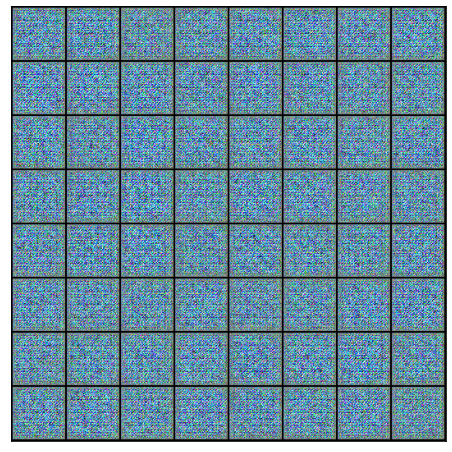

In [33]:
xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

As one might expect, the output from the generator is basically random noise, since we haven't trained it yet. 

Let's move the generator to the chosen device.

In [34]:
generator = to_device(generator, device)

## Discriminator Training

Since the discriminator is a binary classification model, we can use the binary cross entropy loss function to quantify how well it is able to differentiate between real and generated images.

<img src="https://image.slidesharecdn.com/chrishokamp-dublinnlp3-160805110319/95/task-based-learning-for-nlp-going-beyond-cross-entropy-chris-hokamp-10-638.jpg?cb=1470395213" width="420" >

In [35]:
def train_discriminator(real_images, opt_d):
    # Clear discriminator gradients
    opt_d.zero_grad()

    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Pass fake images through discriminator
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

Here are the steps involved in training the discriminator.

- We expect the discriminator to output 1 if the image was picked from the real MNIST dataset, and 0 if it was generated using the generator network. 

- We first pass a batch of real images, and compute the loss, setting the target labels to 1. 

- Then we pass a batch of fake images (generated using the generator) pass them into the discriminator, and compute the loss, setting the target labels to 0. 

- Finally we add the two losses and use the overall loss to perform gradient descent to adjust the weights of the discriminator.

It's important to note that we don't change the weights of the generator model while training the discriminator (`opt_d` only affects the `discriminator.parameters()`)

## Generator Training

Since the outputs of the generator are images, it's not obvious how we can train the generator. This is where we employ a rather elegant trick, which is to use the discriminator as a part of the loss function. Here's how it works:

- We generate a batch of images using the generator, pass the into the discriminator.

- We calculate the loss by setting the target labels to 1 i.e. real. We do this because the generator's objective is to "fool" the discriminator. 

- We use the loss to perform gradient descent i.e. change the weights of the generator, so it gets better at generating real-like images to "fool" the discriminator.

Here's what this looks like in code.

In [36]:
def train_generator(opt_g):
    # Clear generator gradients
    opt_g.zero_grad()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)
    
    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    # Update generator weights
    loss.backward()
    opt_g.step()
    
    return loss.item()

Let's create a directory where we can save intermediate outputs from the generator to visually inspect the progress of the model. We'll also create a helper function to export the generated images.

In [37]:
from torchvision.utils import save_image

In [38]:
sample_dir = '/content/drive/My Drive/monet/generated' 
#os.makedirs(sample_dir, exist_ok=True)

In [39]:

#sample_dir+sample_dir

In [42]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = '/generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), sample_dir+fake_fname, nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

We'll use a fixed set of input vectors to the generator to see how the individual generated images evolve over time as we train the model. Let's save one set of images before we start training our model.

In [43]:
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving /generated-images-0000.png


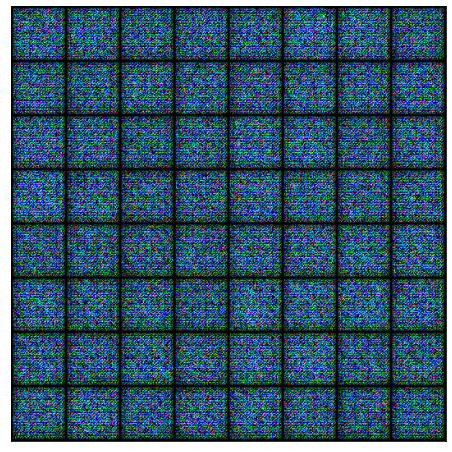

In [44]:
save_samples(0, fixed_latent)

In [45]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/elaafsalem/monet


'https://jovian.ai/elaafsalem/monet'

## Full Training Loop

Let's define a `fit` function to train the discriminator and generator in tandem for each batch of training data. We'll use the Adam optimizer with some custom parameters (betas) that are known to work well for GANs. We will also save some sample generated images at regular intervals for inspection.

<img src="https://i.imgur.com/6NMdO9u.png" style="max-width:420px; margin-bottom:32px"/>



In [58]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [59]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            # Train generator
            loss_g = train_generator(opt_g)
            
        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        # Save generated images
        save_samples(epoch+start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores

We are now ready to train the model. Try different learning rates to see if you can maintain the fine balance between the training the generator and the discriminator.

In [60]:
lr = 0.0002
epochs = 25

In [61]:
jovian.reset()
jovian.log_hyperparams(lr=lr, epochs=epochs)

[jovian] Hyperparams logged.


In [63]:
history = fit(epochs, lr)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/25], loss_g: 5.1722, loss_d: 0.0622, real_score: 0.9507, fake_score: 0.0093
Saving /generated-images-0001.png


  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
losses_g, losses_d, real_scores, fake_scores = history

In [ ]:
jovian.log_metrics(loss_g=losses_g[-1], 
                   loss_d=losses_d[-1], 
                   real_score=real_scores[-1], 
                   fake_score=fake_scores[-1])

Now that we have trained the models, we can save checkpoints.

In [ ]:
# Save the model checkpoints 
torch.save(generator.state_dict(), 'G.pth')
torch.save(discriminator.state_dict(), 'D.pth')

Here's how the generated images look, after the 1st, 5th and 10th epochs of training.

In [ ]:
from IPython.display import Image

In [ ]:
Image('./generated/generated-images-0001.png')

In [ ]:
Image('./generated/generated-images-0005.png')

In [ ]:
Image('./generated/generated-images-0010.png')

In [ ]:
Image('./generated/generated-images-0020.png')

In [ ]:
Image('./generated/generated-images-0025.png')

We can visualize the training process by combining the sample images generated after each epoch into a video using OpenCV.

In [ ]:
import cv2
import os

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'generated' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 1, (530,530))
[out.write(cv2.imread(fname)) for fname in files]
out.release()

Here's what it looks like:

![]()


We can also visualize how the loss changes over time. Visualizing 
losses is quite useful for debugging the training process. For GANs, we expect the generator's loss to reduce over time, without the discriminator's loss getting too high.



In [ ]:
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');

## Save and Commit

We can upload the full snapshot of this experiment to Jovian:
- Jupyter notebook
- Hyperparameters & metrics
- Models weights
- Training video

In [46]:
import jovian

In [48]:
#jovian.commit(project=project_name, 
#              outputs=['G.pth', 'D.pth', 'gans_training.avi'], 
#              environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "G.pth" (not found)
[jovian] Error: Ignoring "D.pth" (not found)
[jovian] Error: Ignoring "gans_training.avi" (not found)


Committed successfully! https://jovian.ai/elaafsalem/monet


'https://jovian.ai/elaafsalem/monet'

In [47]:
from tqdm.notebook import tqdm

import torch.nn.functional as F

def fit(epochs, lr, start_idx=1):

    torch.cuda.empty_cache()

    

    # Losses & scores

    losses_g = []

    losses_d = []

    real_scores = []

    fake_scores = []

    

    # Create optimizers

    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))

    

    for epoch in range(epochs):

        for real_images, _ in tqdm(train_dl):

            # Train discriminator

            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)

            # Train generator

            loss_g = train_generator(opt_g)

            

        # Record losses & scores

        losses_g.append(loss_g)

        losses_d.append(loss_d)

        real_scores.append(real_score)

        fake_scores.append(fake_score)

        

        # Log losses & scores (last batch)

        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(

            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))

    

        # Save generated images

        save_samples(epoch+start_idx, fixed_latent, show=False)

    

    return losses_g, losses_d, real_scores, fake_scores




In [48]:
lr = 0.0002

epochs = 500

In [78]:
history = fit(epochs, lr)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/25], loss_g: 5.8780, loss_d: 0.0396, real_score: 0.9782, fake_score: 0.0169
Saving /generated-images-0001.png


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [2/25], loss_g: 5.3691, loss_d: 0.0235, real_score: 0.9852, fake_score: 0.0084
Saving /generated-images-0002.png


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [3/25], loss_g: 5.7203, loss_d: 0.0210, real_score: 0.9870, fake_score: 0.0078
Saving /generated-images-0003.png


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [4/25], loss_g: 5.9386, loss_d: 0.0124, real_score: 0.9930, fake_score: 0.0054
Saving /generated-images-0004.png


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [5/25], loss_g: 5.7447, loss_d: 0.0131, real_score: 0.9941, fake_score: 0.0071
Saving /generated-images-0005.png


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [6/25], loss_g: 6.0603, loss_d: 0.0124, real_score: 0.9961, fake_score: 0.0084
Saving /generated-images-0006.png


  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [50]:
losses_g, losses_d, real_scores, fake_scores = history

jovian.log_metrics(loss_g=losses_g[-1], 
                   loss_d=losses_d[-1], 
                   real_score=real_scores[-1], 
                   fake_score=fake_scores[-1])

# Save the model checkpoints 
torch.save(generator.state_dict(), 'G.pth')
torch.save(discriminator.state_dict(), 'D.pth')

[jovian] Metrics logged.


In [51]:

#from IPython.display import Image

#Image('./generated/generated-images-0001.png')

#Image('./generated/generated-images-0002.png')

#Image('./generated/generated-images-0010.png')

#Image('./generated/generated-images-0020.png')

#Image('./generated/generated-images-0025.png')



In [72]:
import cv2

import os
vid_fname = 'gans_training.avi'
files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'generated' in f]
files.sort()
out = cv2.VideoWriter(vid_fname, cv2.VideoWriter_fourcc(*'MP4V'), 1, (530,530))
[out.write(cv2.imread(fname)) for fname in files]
for fname in files:
  out.write(cv2.imread(fname))
#out.release()

In [76]:
sample_dir

'/content/drive/My Drive/monet/generated'

In [77]:
import cv2
import os

image_folder = sample_dir
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [71]:
files

['/content/drive/My Drive/monet/generated/generated-images-0000.png',
 '/content/drive/My Drive/monet/generated/generated-images-0001.png',
 '/content/drive/My Drive/monet/generated/generated-images-0002.png',
 '/content/drive/My Drive/monet/generated/generated-images-0003.png',
 '/content/drive/My Drive/monet/generated/generated-images-0004.png',
 '/content/drive/My Drive/monet/generated/generated-images-0005.png',
 '/content/drive/My Drive/monet/generated/generated-images-0006.png',
 '/content/drive/My Drive/monet/generated/generated-images-0007.png',
 '/content/drive/My Drive/monet/generated/generated-images-0008.png',
 '/content/drive/My Drive/monet/generated/generated-images-0009.png',
 '/content/drive/My Drive/monet/generated/generated-images-0010.png',
 '/content/drive/My Drive/monet/generated/generated-images-0011.png',
 '/content/drive/My Drive/monet/generated/generated-images-0012.png',
 '/content/drive/My Drive/monet/generated/generated-images-0013.png',
 '/content/drive/My 

In [66]:
out

<VideoWriter 0x7f7c4e140850>

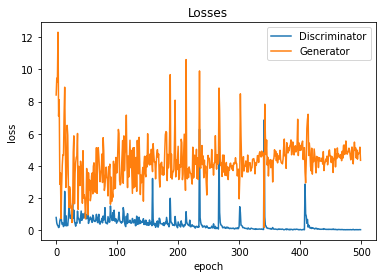

In [56]:

plt.plot(losses_d, '-')

plt.plot(losses_g, '-')

plt.xlabel('epoch')

plt.ylabel('loss')

plt.legend(['Discriminator', 'Generator'])

plt.title('Losses');



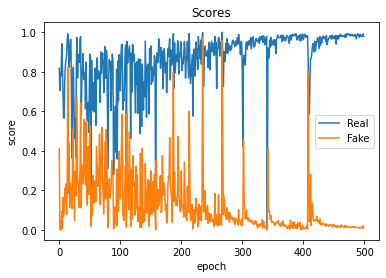

In [57]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');